In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# Import .csv file
datafile = pd.read_csv("/Users/noahwaller/Documents/3cohort-GIMME PAPER/csv_for-python/mihyst_visqst_unpl.csv")
datafile.head()

,SUBID,age,gender,pd02_bsl,mbm_score_bsl,ss_score_bsl,fm_score_bsl,pd02_6m,mbm_score_6m,ss_score_6m,fm_score_6m,ratio,responder,vis01_unpl_avg,vis02_unpl_avg,vis03_unpl_avg,vis04_unpl_avg,vis05_unpl_avg,vis06_unpl_avg,vis_unpl_avg
0,3007,54,2,9,12,9,21,9.0,0.0,9.0,9.0,1.000000,0,23.000000,33.000000,49.666667,60.000000,70.000000,69.666667,50.888889
1,3016,39,2,7,4,4,8,6.0,0.0,4.0,4.0,0.857143,0,47.000000,38.333333,45.000000,62.000000,60.666667,71.666667,54.111111
2,3032,46,2,9,4,10,14,6.0,0.0,9.0,9.0,0.666667,0,78.000000,67.666667,65.666667,81.666667,95.666667,95.333333,80.666667
3,3033,35,2,6,8,10,18,7.0,0.0,8.0,8.0,1.166667,0,8.666667,24.000000,40.333333,74.000000,80.333333,88.666667,52.666667
4,3077,27,2,7,0,6,6,5.0,0.0,4.0,4.0,0.714286,0,9.666667,18.333333,48.333333,56.333333,66.666667,74.333333,45.611111


In [31]:
# Define list flattener function (useful for simplifying matplotlib)
# no longer necessary but kept here for the future
def flatten(xss):
    return [x for xs in xss for x in xs]

In [61]:
# Set font size, type, and style for all graphs
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [98]:
group1 = datafile.loc[datafile['responder'] == 0]
group1.head()

,SUBID,age,gender,pd02_bsl,mbm_score_bsl,ss_score_bsl,fm_score_bsl,pd02_6m,mbm_score_6m,ss_score_6m,fm_score_6m,ratio,responder,vis01_unpl_avg,vis02_unpl_avg,vis03_unpl_avg,vis04_unpl_avg,vis05_unpl_avg,vis06_unpl_avg,vis_unpl_avg
0,3007,54,2,9,12,9,21,9.0,0.0,9.0,9.0,1.000000,0,23.000000,33.000000,49.666667,60.000000,70.000000,69.666667,50.888889
1,3016,39,2,7,4,4,8,6.0,0.0,4.0,4.0,0.857143,0,47.000000,38.333333,45.000000,62.000000,60.666667,71.666667,54.111111
2,3032,46,2,9,4,10,14,6.0,0.0,9.0,9.0,0.666667,0,78.000000,67.666667,65.666667,81.666667,95.666667,95.333333,80.666667
3,3033,35,2,6,8,10,18,7.0,0.0,8.0,8.0,1.166667,0,8.666667,24.000000,40.333333,74.000000,80.333333,88.666667,52.666667
4,3077,27,2,7,0,6,6,5.0,0.0,4.0,4.0,0.714286,0,9.666667,18.333333,48.333333,56.333333,66.666667,74.333333,45.611111


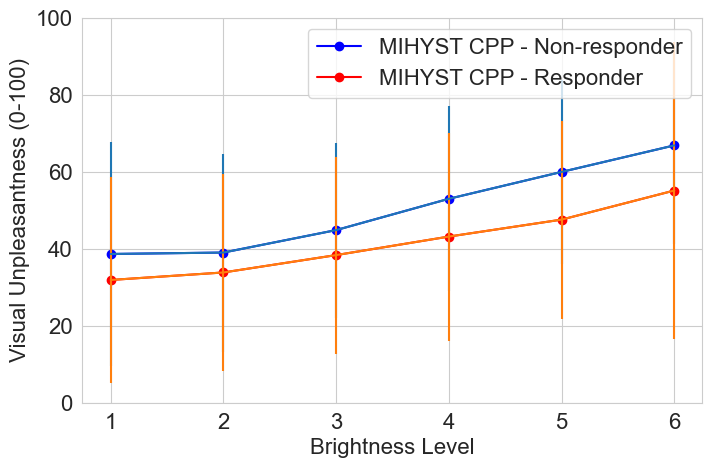

In [99]:
# Make line graph of visual unpleasantness ratings across 6 brightness levels

plt.figure(figsize=(8,5)) # set fig size

x = [1, 2, 3, 4, 5, 6] # brightness levels

group1_df = datafile.loc[datafile['responder'] == 0] # created subframes by group
group2_df = datafile.loc[datafile['responder'] == 1]

y_group1 = [group1_df['vis01_unpl_avg'].mean(), group1_df['vis02_unpl_avg'].mean(), group1_df['vis03_unpl_avg'].mean(),
     group1_df['vis04_unpl_avg'].mean(), group1_df['vis05_unpl_avg'].mean(), group1_df['vis06_unpl_avg'].mean()] # calc mean
yerror_group1 = [group1_df['vis01_unpl_avg'].std(), group1_df['vis02_unpl_avg'].std(), group1_df['vis03_unpl_avg'].std(), 
          group1_df['vis04_unpl_avg'].std(), group1_df['vis05_unpl_avg'].std(), group1_df['vis06_unpl_avg'].std()] # calc SD

y_group2 = [group2_df['vis01_unpl_avg'].mean(), group2_df['vis02_unpl_avg'].mean(), group2_df['vis03_unpl_avg'].mean(),
     group2_df['vis04_unpl_avg'].mean(), group2_df['vis05_unpl_avg'].mean(), group2_df['vis06_unpl_avg'].mean()] # calc mean
yerror_group2 = [group2_df['vis01_unpl_avg'].std(), group2_df['vis02_unpl_avg'].std(), group2_df['vis03_unpl_avg'].std(), 
          group2_df['vis04_unpl_avg'].std(), group2_df['vis05_unpl_avg'].std(), group2_df['vis06_unpl_avg'].std()] # calc SD

plt.plot(x, y_group1, marker='o', color='b', label='MIHYST CPP - Non-responder') # plot x and y, set custom details
plt.plot(x, y_group2, marker='o', color='r', label='MIHYST CPP - Responder') # plot x and y, set custom details

plt.errorbar(x, y_group1, yerr=yerror_group1) # add error bars
plt.errorbar(x, y_group2, yerr=yerror_group2) # add error bars

plt.ylim([0, 100]) # set y axis limit

plt.ylabel('Visual Unpleasantness (0-100)') # ylabel
plt.xlabel('Brightness Level') # xlabel
plt.legend() # plot legend based on labels

plt.show() # show plot